# 📊 Analisis Missing Data pada Dataset Titanic
**Implementasi Tiga Metode Imputasi: Simple, KNN, dan MICE Algorithm**

---

## 👤 **Author Information**
- **👨‍🎓 Nama**: Ferdian Bangkit Wijaya
- **🏛️ Afiliasi**: Universitas Sultan Ageng Tirtayasa
- **📧 Email**: ferdian.bangkit@untirta.ac.id
- **📅 Tanggal**: September 2025

---

## 🎯 **Tujuan Analisis**

Notebook ini akan melakukan analisis komprehensif terhadap missing data pada dataset Titanic dan mengimplementasikan tiga metode imputasi yang berbeda.

### 🛠️ **Metode Imputasi yang Diimplementasikan:**
1. **📊 Simple Imputation** - Mean, Median, Mode
2. **🎯 K-Nearest Neighbors (KNN)** - Imputasi berbasis similarity optimal
3. **🔄 MICE (Multiple Imputation by Chained Equations)** - Multi-strategy imputation

---

## 🐍 **Python Libraries & Dependencies**

### 📦 **Libraries yang Digunakan:**
- **pandas** - Data manipulation dan analisis
- **numpy** - Numerical computing
- **matplotlib** - Basic plotting dan visualisasi  
- **seaborn** - Statistical data visualization + Dataset Titanic
- **scikit-learn** - Machine learning algorithms untuk imputasi
- **missingno** - Specialized library untuk visualisasi missing data

### 🔧 **Features Notebook:**
- ✅ **Auto-Install Dependencies** - Otomatis menginstal library yang belum terinstal
- ✅ **Enhanced Error Handling** - Menangani error instalasi dengan graceful fallback
- ✅ **Progress Tracking** - Real-time feedback saat instalasi dan eksekusi
- ✅ **Comprehensive Analysis** - Analisis mendalam pola missing data
- ✅ **Interactive Visualizations** - Multiple charts dan heatmaps
- ✅ **Performance Comparison** - Evaluasi kualitas metode imputasi
- ✅ **Robust MICE Implementation** - MICE dengan fallback mechanism yang kuat

---

**🚀 Mari kita mulai analisis!**

In [1]:
# ================================================================
# 🔧 AUTO-INSTALL DAN SETUP PACKAGES
# ================================================================

# Fungsi untuk auto-install package jika belum terinstal
import subprocess
import sys
import importlib

def install_package(package_name, import_name=None):
    """
    Install package jika belum terinstal
    Args:
        package_name: nama package untuk pip install
        import_name: nama untuk import (jika berbeda dari package_name)
    """
    if import_name is None:
        import_name = package_name
    
    try:
        importlib.import_module(import_name)
        print(f"✅ {package_name} sudah terinstal")
        return True
    except ImportError:
        try:
            print(f"📦 Menginstal {package_name}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name], 
                                capture_output=True, text=True)
            print(f"✅ {package_name} berhasil diinstal!")
            return True
        except subprocess.CalledProcessError as e:
            print(f"❌ Gagal menginstal {package_name}: {e}")
            return False
        except Exception as e:
            print(f"❌ Error tidak terduga saat menginstal {package_name}: {e}")
            return False

# Daftar package yang diperlukan (package_name, import_name)
required_packages = [
    ('pandas', 'pandas'),
    ('numpy', 'numpy'), 
    ('matplotlib', 'matplotlib'),
    ('seaborn', 'seaborn'),
    ('scikit-learn', 'sklearn'),
    ('missingno', 'missingno')
]

print("🔄 Memeriksa dan menginstal dependencies...")
print("=" * 60)

# Install package yang diperlukan
failed_packages = []
for package_name, import_name in required_packages:
    if not install_package(package_name, import_name):
        failed_packages.append(package_name)

if failed_packages:
    print(f"\n⚠️  Warning: Gagal menginstal {', '.join(failed_packages)}")
    print("💡 Silakan install manual dengan: pip install " + " ".join(failed_packages))
else:
    print("\n🎉 Semua dependencies berhasil diverifikasi/diinstal!")

print("=" * 60)
print("📚 Mengimpor libraries...")

# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Libraries untuk visualisasi missing data
import missingno as msno

# Libraries untuk machine learning dan imputasi
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Setting untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("\n✅ Semua libraries berhasil diimpor!")
print("🚢 Siap untuk analisis missing data pada dataset Titanic")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"📈 Seaborn version: {sns.__version__}")

🔄 Memeriksa dan menginstal dependencies...
✅ pandas sudah terinstal
✅ numpy sudah terinstal
✅ matplotlib sudah terinstal
✅ pandas sudah terinstal
✅ numpy sudah terinstal
✅ matplotlib sudah terinstal
✅ seaborn sudah terinstal
✅ scikit-learn sudah terinstal
✅ missingno sudah terinstal

🎉 Semua dependencies berhasil diverifikasi/diinstal!
📚 Mengimpor libraries...
✅ seaborn sudah terinstal
✅ scikit-learn sudah terinstal
✅ missingno sudah terinstal

🎉 Semua dependencies berhasil diverifikasi/diinstal!
📚 Mengimpor libraries...

✅ Semua libraries berhasil diimpor!
🚢 Siap untuk analisis missing data pada dataset Titanic
📊 Pandas version: 2.3.1
🔢 NumPy version: 2.3.1
📈 Seaborn version: 0.13.2

✅ Semua libraries berhasil diimpor!
🚢 Siap untuk analisis missing data pada dataset Titanic
📊 Pandas version: 2.3.1
🔢 NumPy version: 2.3.1
📈 Seaborn version: 0.13.2


In [2]:
# 1. LOAD DATASET TITANIC
print("=" * 60)
print("🚢 LOADING DATASET TITANIC")
print("=" * 60)

# Load dataset Titanic dari seaborn
titanic = sns.load_dataset('titanic')

# Informasi dasar dataset
print(f"📏 Dimensi dataset: {titanic.shape}")
print(f"📊 Jumlah baris: {titanic.shape[0]}")
print(f"📋 Jumlah kolom: {titanic.shape[1]}")
print("\n📝 Informasi kolom:")
print(titanic.info())

print("\n" + "=" * 60)
print("📋 PREVIEW DATA (5 baris pertama)")
print("=" * 60)
titanic.head()

🚢 LOADING DATASET TITANIC
📏 Dimensi dataset: (891, 15)
📊 Jumlah baris: 891
📋 Jumlah kolom: 15

📝 Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 2. ANALISIS MISSING DATA DETAIL
print("=" * 60)
print("🔍 ANALISIS MISSING DATA KOMPREHENSIF")
print("=" * 60)

# Fungsi untuk analisis missing data yang detail
def analyze_missing_data(df):
    """
    Fungsi untuk menganalisis missing data secara komprehensif
    """
    # Hitung missing values per kolom
    missing_data = pd.DataFrame({
        'Kolom': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    
    # Filter hanya kolom yang memiliki missing data
    missing_data = missing_data[missing_data['Missing_Count'] > 0]
    missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
    
    return missing_data

# Analisis missing data
missing_analysis = analyze_missing_data(titanic)

print("📊 MISSING DATA PER KOLOM:")
print("-" * 50)
if len(missing_analysis) > 0:
    for idx, row in missing_analysis.iterrows():
        print(f"🔸 {row['Kolom']:<12} : {row['Missing_Count']:>3} missing ({row['Missing_Percentage']:>5.1f}%)")
else:
    print("✅ Tidak ada missing data!")

print(f"\n📈 TOTAL MISSING VALUES: {titanic.isnull().sum().sum()}")
print(f"📊 PERSENTASE TOTAL MISSING: {(titanic.isnull().sum().sum() / titanic.size) * 100:.2f}%")

missing_analysis

🔍 ANALISIS MISSING DATA KOMPREHENSIF
📊 MISSING DATA PER KOLOM:
--------------------------------------------------
🔸 deck         : 688 missing ( 77.2%)
🔸 age          : 177 missing ( 19.9%)
🔸 embarked     :   2 missing (  0.2%)
🔸 embark_town  :   2 missing (  0.2%)

📈 TOTAL MISSING VALUES: 869
📊 PERSENTASE TOTAL MISSING: 6.50%


,Kolom,Missing_Count,Missing_Percentage,Data_Type
deck,deck,688,77.216611,category
age,age,177,19.865320,float64
embarked,embarked,2,0.224467,object
embark_town,embark_town,2,0.224467,object


In [4]:
# 3. ANALISIS MISSING DATA PER BARIS
print("=" * 60)
print("📋 ANALISIS MISSING DATA PER BARIS")
print("=" * 60)

# Hitung missing values per baris
rows_with_missing = titanic.isnull().any(axis=1).sum()
total_rows = len(titanic)
percentage_rows_missing = (rows_with_missing / total_rows) * 100

print(f"📊 Baris dengan missing data: {rows_with_missing} dari {total_rows} baris")
print(f"📈 Persentase baris dengan missing data: {percentage_rows_missing:.2f}%")

# Distribusi jumlah missing values per baris
missing_per_row = titanic.isnull().sum(axis=1)
missing_distribution = missing_per_row.value_counts().sort_index()

print(f"\n📋 DISTRIBUSI MISSING VALUES PER BARIS:")
print("-" * 40)
for missing_count, row_count in missing_distribution.items():
    if missing_count > 0:
        print(f"🔸 {missing_count} missing value(s): {row_count} baris ({(row_count/total_rows)*100:.1f}%)")

# Tampilkan beberapa baris yang memiliki missing data
print(f"\n🔍 CONTOH BARIS DENGAN MISSING DATA (5 pertama):")
print("-" * 50)
rows_with_missing_data = titanic[titanic.isnull().any(axis=1)].head()
rows_with_missing_data

📋 ANALISIS MISSING DATA PER BARIS
📊 Baris dengan missing data: 709 dari 891 baris
📈 Persentase baris dengan missing data: 79.57%

📋 DISTRIBUSI MISSING VALUES PER BARIS:
----------------------------------------
🔸 1 missing value(s): 549 baris (61.6%)
🔸 2 missing value(s): 160 baris (18.0%)

🔍 CONTOH BARIS DENGAN MISSING DATA (5 pertama):
--------------------------------------------------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


📊 VISUALISASI POLA MISSING DATA


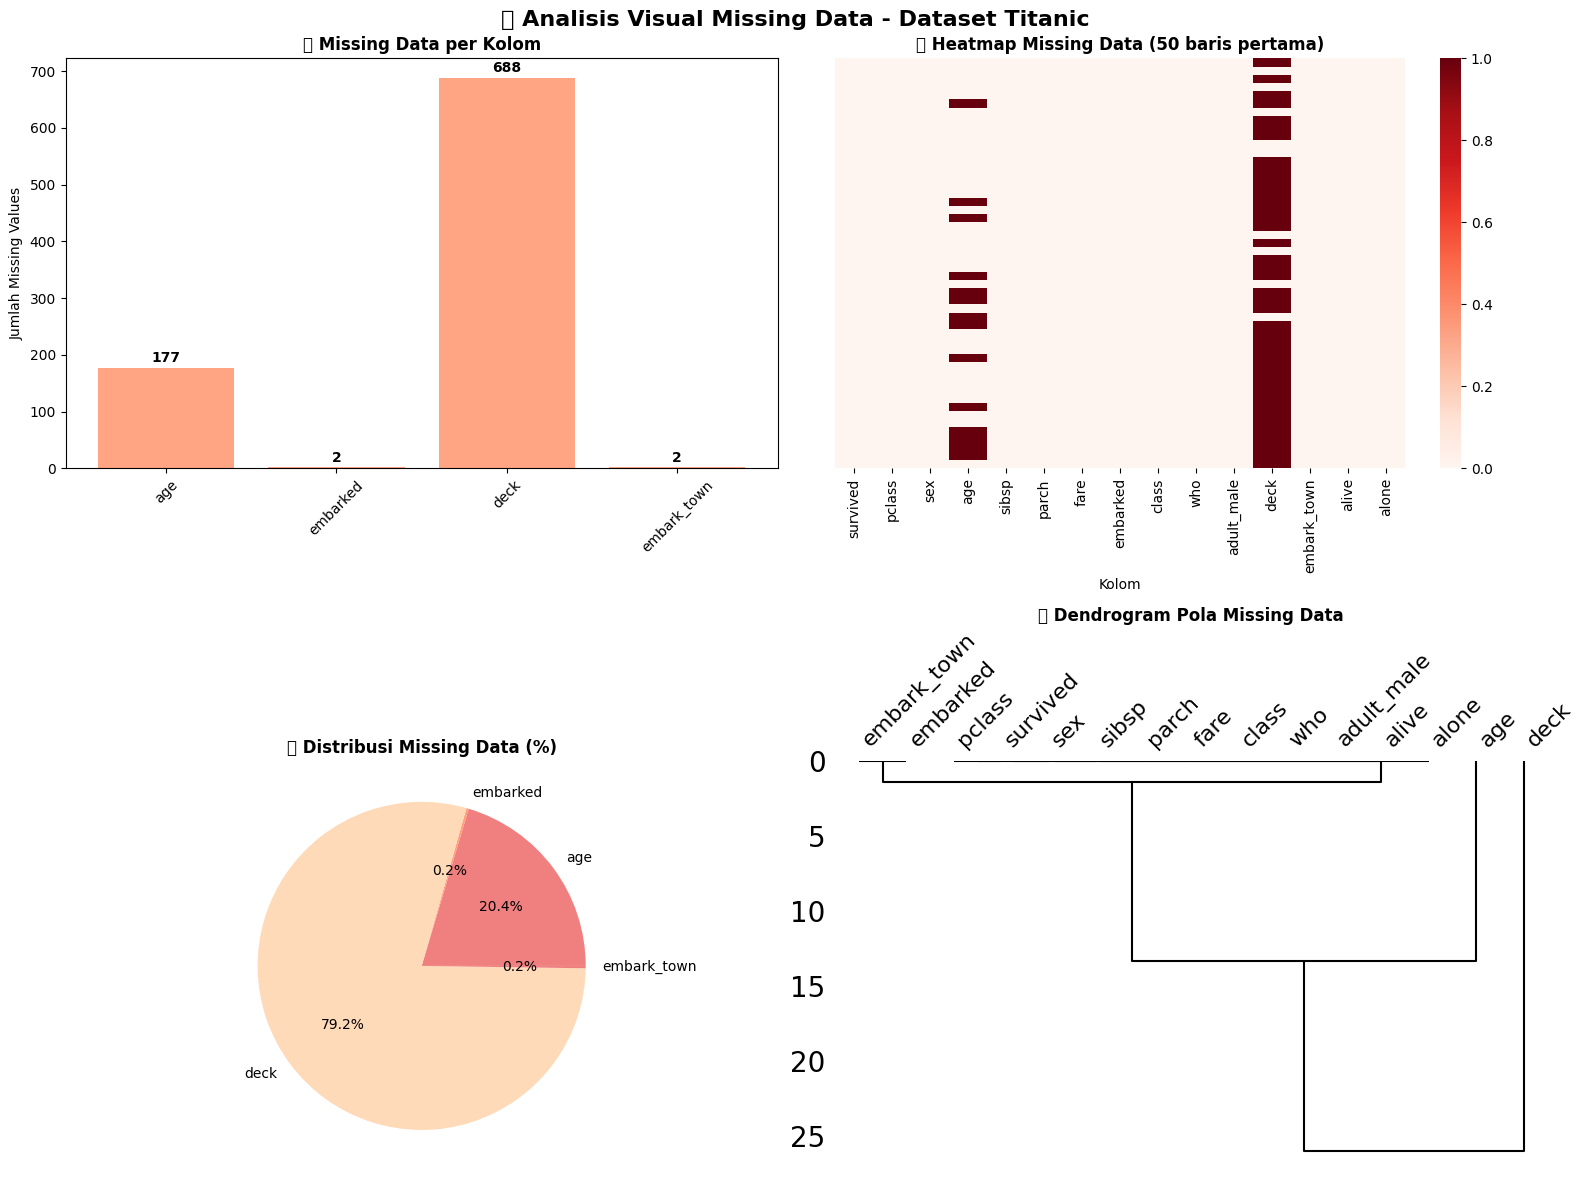

✅ Visualisasi missing data selesai!


In [5]:
# 4. VISUALISASI MISSING DATA
print("=" * 60)
print("📊 VISUALISASI POLA MISSING DATA")
print("=" * 60)

# Setup untuk multiple plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Analisis Visual Missing Data - Dataset Titanic', fontsize=16, fontweight='bold')

# 1. Bar chart missing data per kolom
missing_counts = titanic.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

axes[0,0].bar(missing_cols.index, missing_cols.values, color='coral', alpha=0.7)
axes[0,0].set_title('🔸 Missing Data per Kolom', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Jumlah Missing Values')
axes[0,0].tick_params(axis='x', rotation=45)

# Tambahkan label pada bar
for i, v in enumerate(missing_cols.values):
    axes[0,0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Heatmap missing data
missing_matrix = titanic.isnull().astype(int)
sns.heatmap(missing_matrix.iloc[:50], # Tampilkan 50 baris pertama
            cbar=True, 
            cmap='Reds',
            yticklabels=False,
            ax=axes[0,1])
axes[0,1].set_title('🔸 Heatmap Missing Data (50 baris pertama)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Kolom')

# 3. Persentase missing data
missing_percentage = (titanic.isnull().sum() / len(titanic)) * 100
missing_perc_cols = missing_percentage[missing_percentage > 0]

wedges, texts, autotexts = axes[1,0].pie(missing_perc_cols.values, 
                                        labels=missing_perc_cols.index,
                                        autopct='%1.1f%%',
                                        colors=['lightcoral', 'lightsalmon', 'peachpuff'])
axes[1,0].set_title('🔸 Distribusi Missing Data (%)', fontsize=12, fontweight='bold')

# 4. Missing data pattern dengan missingno
plt.subplot(2, 2, 4)
msno.dendrogram(titanic, ax=plt.gca())
plt.title('🔸 Dendrogram Pola Missing Data', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualisasi missing data selesai!")

📊 VISUALISASI LANJUTAN MISSING DATA PATTERNS


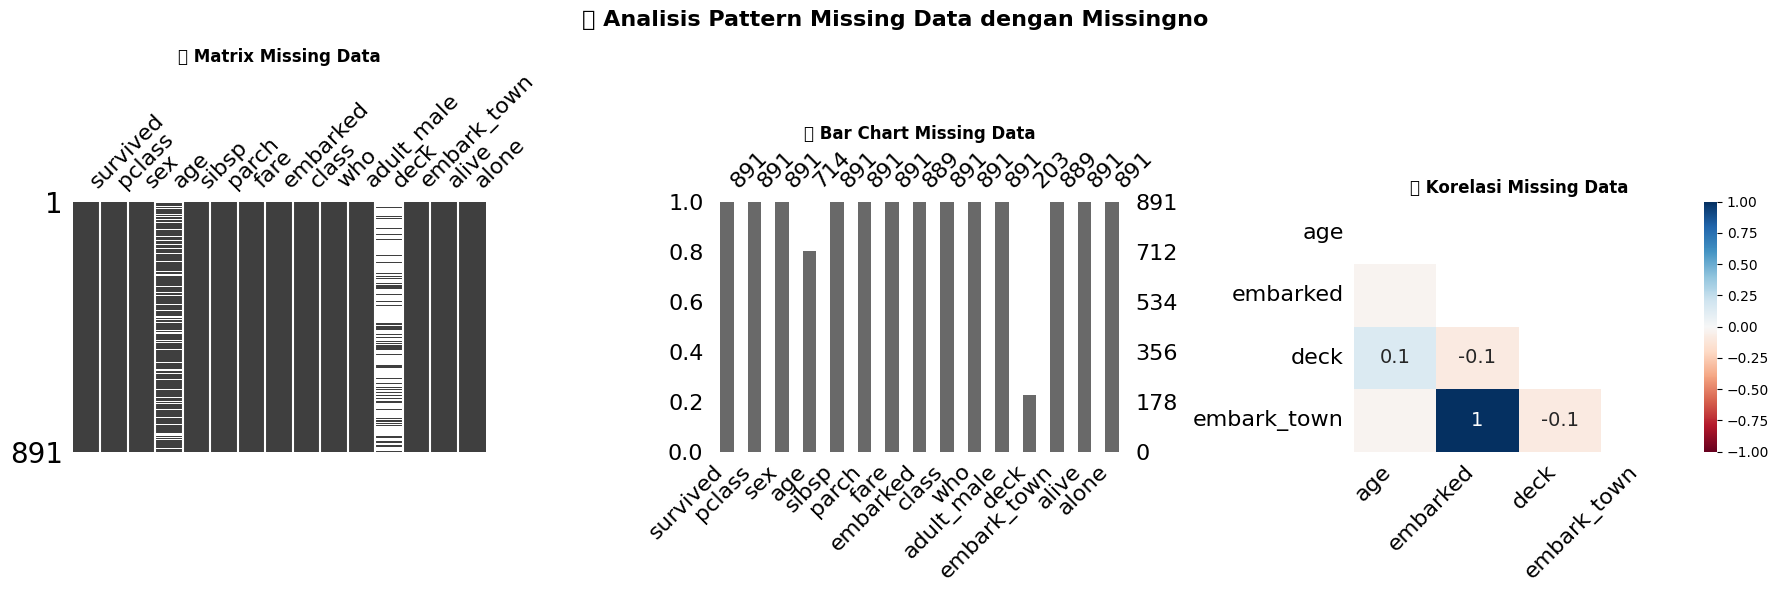

✅ Visualisasi pattern missing data selesai!


In [6]:
# 5. VISUALISASI TAMBAHAN DENGAN MISSINGNO
print("=" * 60)
print("📊 VISUALISASI LANJUTAN MISSING DATA PATTERNS")
print("=" * 60)

# Setup untuk visualisasi missingno
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('📊 Analisis Pattern Missing Data dengan Missingno', fontsize=16, fontweight='bold')

# 1. Matrix plot - menunjukkan pola missing data
plt.subplot(1, 3, 1)
msno.matrix(titanic, ax=plt.gca())
plt.title('🔸 Matrix Missing Data', fontsize=12, fontweight='bold')

# 2. Bar plot - jumlah missing per kolom
plt.subplot(1, 3, 2)
msno.bar(titanic, ax=plt.gca())
plt.title('🔸 Bar Chart Missing Data', fontsize=12, fontweight='bold')

# 3. Heatmap korelasi missing data
plt.subplot(1, 3, 3)
msno.heatmap(titanic, ax=plt.gca())
plt.title('🔸 Korelasi Missing Data', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualisasi pattern missing data selesai!")

## 🛠️ METODE IMPUTASI MISSING DATA

Sekarang kita akan mengimplementasikan tiga metode imputasi yang berbeda:

### 1. 📊 Imputasi Sederhana (Simple Imputation)
- **Mean**: Untuk data numerik kontinyu
- **Median**: Untuk data numerik yang mungkin memiliki outlier
- **Mode**: Untuk data kategorikal

### 2. 🎯 K-Nearest Neighbors (KNN) Imputation
- Menggunakan similarity dengan data points terdekat
- Cocok untuk data yang memiliki pola relationship antar fitur

### 3. 🔄 Multiple Imputation by Chained Equations (MICE)
- Imputasi iteratif yang mempertimbangkan uncertainty
- Menghasilkan multiple datasets untuk analisis yang lebih robust

In [7]:
# 6. PERSIAPAN DATA UNTUK IMPUTASI
print("=" * 60)
print("⚙️ PERSIAPAN DATA UNTUK IMPUTASI")
print("=" * 60)

# Buat copy dari data original untuk masing-masing metode
titanic_original = titanic.copy()
titanic_simple = titanic.copy()
titanic_knn = titanic.copy()
titanic_mice = titanic.copy()

# Identifikasi kolom numerik dan kategorikal
numeric_cols = titanic.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"📊 Kolom Numerik: {numeric_cols}")
print(f"📋 Kolom Kategorikal: {categorical_cols}")

# Cek missing data per tipe
print(f"\n🔍 MISSING DATA PER TIPE KOLOM:")
print("-" * 40)
for col in titanic.columns:
    missing_count = titanic[col].isnull().sum()
    if missing_count > 0:
        col_type = "Numerik" if col in numeric_cols else "Kategorikal"
        print(f"🔸 {col:<12} ({col_type:<11}): {missing_count:>3} missing")

print(f"\n✅ Data siap untuk imputasi!")

⚙️ PERSIAPAN DATA UNTUK IMPUTASI
📊 Kolom Numerik: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
📋 Kolom Kategorikal: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

🔍 MISSING DATA PER TIPE KOLOM:
----------------------------------------
🔸 age          (Numerik    ): 177 missing
🔸 embarked     (Kategorikal):   2 missing
🔸 deck         (Kategorikal): 688 missing
🔸 embark_town  (Kategorikal):   2 missing

✅ Data siap untuk imputasi!


In [8]:
# 7. METODE 1: IMPUTASI SEDERHANA (SIMPLE IMPUTATION)
print("=" * 60)
print("📊 METODE 1: IMPUTASI SEDERHANA")
print("=" * 60)

def simple_imputation(df, strategy_numeric='mean', strategy_categorical='most_frequent'):
    """
    Melakukan imputasi sederhana pada dataset
    """
    df_imputed = df.copy()
    
    # Pisahkan kolom numerik dan kategorikal
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Imputasi untuk kolom numerik
    if len(numeric_columns) > 0:
        imputer_numeric = SimpleImputer(strategy=strategy_numeric)
        df_imputed[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])
        
        print(f"✅ Imputasi numerik dengan strategy '{strategy_numeric}' selesai")
        for col in numeric_columns:
            if df[col].isnull().sum() > 0:
                if strategy_numeric == 'mean':
                    value = df[col].mean()
                elif strategy_numeric == 'median':
                    value = df[col].median()
                print(f"   🔸 {col}: menggunakan {strategy_numeric} = {value:.2f}")
    
    # Imputasi untuk kolom kategorikal
    if len(categorical_columns) > 0:
        imputer_categorical = SimpleImputer(strategy=strategy_categorical)
        df_imputed[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])
        
        print(f"✅ Imputasi kategorikal dengan strategy '{strategy_categorical}' selesai")
        for col in categorical_columns:
            if df[col].isnull().sum() > 0:
                mode_value = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'Unknown'
                print(f"   🔸 {col}: menggunakan mode = '{mode_value}'")
    
    return df_imputed

# Implementasi imputasi sederhana
print("🔄 Melakukan imputasi sederhana...")
titanic_simple_imputed = simple_imputation(titanic_simple, 
                                          strategy_numeric='mean', 
                                          strategy_categorical='most_frequent')

# Verifikasi hasil
missing_after_simple = titanic_simple_imputed.isnull().sum().sum()
print(f"\n📊 HASIL IMPUTASI SEDERHANA:")
print(f"   🔸 Missing values sebelum: {titanic_simple.isnull().sum().sum()}")
print(f"   🔸 Missing values sesudah: {missing_after_simple}")
print(f"   🔸 Status: {'✅ Berhasil' if missing_after_simple == 0 else '❌ Masih ada missing'}")

print(f"\n📋 Preview data setelah imputasi sederhana:")
titanic_simple_imputed.head()

📊 METODE 1: IMPUTASI SEDERHANA
🔄 Melakukan imputasi sederhana...
✅ Imputasi numerik dengan strategy 'mean' selesai
   🔸 age: menggunakan mean = 29.70
✅ Imputasi kategorikal dengan strategy 'most_frequent' selesai
   🔸 embarked: menggunakan mode = 'S'
   🔸 deck: menggunakan mode = 'C'
   🔸 embark_town: menggunakan mode = 'Southampton'

📊 HASIL IMPUTASI SEDERHANA:
   🔸 Missing values sebelum: 869
   🔸 Missing values sesudah: 0
   🔸 Status: ✅ Berhasil

📋 Preview data setelah imputasi sederhana:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True


In [9]:
# 8. METODE 2: IMPUTASI K-NEAREST NEIGHBORS (KNN)
print("=" * 60)
print("🎯 METODE 2: IMPUTASI K-NEAREST NEIGHBORS (KNN)")
print("=" * 60)

def knn_imputation(df, n_neighbors=5):
    """
    Melakukan imputasi menggunakan KNN
    """
    df_imputed = df.copy()
    
    # Encode categorical variables untuk KNN
    le_dict = {}
    df_encoded = df.copy()
    
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    print(f"🔄 Encoding {len(categorical_columns)} kolom kategorikal untuk KNN...")
    for col in categorical_columns:
        if df[col].isnull().sum() < len(df):  # Pastikan ada data non-null
            le = LabelEncoder()
            # Fit hanya pada data non-null
            non_null_data = df[col].dropna()
            le.fit(non_null_data)
            le_dict[col] = le
            
            # Transform dengan handling missing values
            df_encoded[col] = df[col].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
            print(f"   🔸 {col}: {len(le.classes_)} kategori unik")
    
    # Implementasi KNN Imputer
    print(f"\n🎯 Melakukan KNN imputation dengan k={n_neighbors}...")
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed_encoded = pd.DataFrame(
        knn_imputer.fit_transform(df_encoded),
        columns=df_encoded.columns,
        index=df_encoded.index
    )
    
    # Decode categorical variables kembali
    print(f"🔄 Decoding kolom kategorikal...")
    for col in categorical_columns:
        if col in le_dict:
            # Round dan convert ke integer untuk categorical
            df_imputed_encoded[col] = df_imputed_encoded[col].round().astype(int)
            # Clamp values to valid range
            max_val = len(le_dict[col].classes_) - 1
            df_imputed_encoded[col] = df_imputed_encoded[col].clip(0, max_val)
            # Inverse transform
            df_imputed[col] = le_dict[col].inverse_transform(df_imputed_encoded[col])
    
    # Copy back numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        df_imputed[col] = df_imputed_encoded[col]
    
    return df_imputed

# Implementasi KNN imputation
print("🔄 Melakukan KNN imputation...")
titanic_knn_imputed = knn_imputation(titanic_knn, n_neighbors=5)

# Verifikasi hasil
missing_after_knn = titanic_knn_imputed.isnull().sum().sum()
print(f"\n📊 HASIL IMPUTASI KNN:")
print(f"   🔸 Missing values sebelum: {titanic_knn.isnull().sum().sum()}")
print(f"   🔸 Missing values sesudah: {missing_after_knn}")
print(f"   🔸 Status: {'✅ Berhasil' if missing_after_knn == 0 else '❌ Masih ada missing'}")

print(f"\n📋 Preview data setelah imputasi KNN:")
titanic_knn_imputed.head()

🎯 METODE 2: IMPUTASI K-NEAREST NEIGHBORS (KNN)
🔄 Melakukan KNN imputation...
🔄 Encoding 7 kolom kategorikal untuk KNN...
   🔸 sex: 2 kategori unik
   🔸 embarked: 3 kategori unik
   🔸 class: 3 kategori unik
   🔸 who: 3 kategori unik
   🔸 deck: 7 kategori unik
   🔸 embark_town: 3 kategori unik
   🔸 alive: 2 kategori unik

🎯 Melakukan KNN imputation dengan k=5...
   🔸 embark_town: 3 kategori unik
   🔸 alive: 2 kategori unik

🎯 Melakukan KNN imputation dengan k=5...
🔄 Decoding kolom kategorikal...

📊 HASIL IMPUTASI KNN:
   🔸 Missing values sebelum: 869
   🔸 Missing values sesudah: 0
   🔸 Status: ✅ Berhasil

📋 Preview data setelah imputasi KNN:
🔄 Decoding kolom kategorikal...

📊 HASIL IMPUTASI KNN:
   🔸 Missing values sebelum: 869
   🔸 Missing values sesudah: 0
   🔸 Status: ✅ Berhasil

📋 Preview data setelah imputasi KNN:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,F,Southampton,no,False
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,F,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,E,Southampton,no,True


In [10]:
# ================================================================
# 🔄 METODE 3: MULTIPLE IMPUTATION BY CHAINED EQUATIONS (MICE)
# ================================================================

print("=" * 60)
print("🔄 METODE 3: MULTIPLE IMPUTATION BY CHAINED EQUATIONS (MICE)")
print("=" * 60)

def improved_mice_imputation(df, max_iter=15, random_state=42, n_imputations=5):
    """
    Improved MICE imputation dengan robust error handling
    """
    df_imputed = df.copy()
    
    print(f"🔄 Mempersiapkan data untuk MICE imputation...")
    
    # Check missing values sebelum memulai
    initial_missing = df.isnull().sum().sum()
    print(f"   📊 Total missing values awal: {initial_missing}")
    
    if initial_missing == 0:
        print("   ✅ Tidak ada missing values untuk diimputasi!")
        return df_imputed
    
    # Identifikasi kolom dengan masalah
    problematic_cols = []
    
    # Check kolom yang semua nilainya missing
    all_missing_cols = [col for col in df.columns if df[col].isnull().all()]
    if all_missing_cols:
        print(f"   ⚠️  Kolom dengan semua nilai missing: {all_missing_cols}")
        problematic_cols.extend(all_missing_cols)
    
    # Check kolom dengan variance sangat rendah
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    low_variance_cols = []
    for col in numeric_cols:
        non_null_values = df[col].dropna()
        if len(non_null_values) > 1 and non_null_values.var() < 1e-8:
            low_variance_cols.append(col)
    
    if low_variance_cols:
        print(f"   ⚠️  Kolom dengan variance rendah: {low_variance_cols}")
        problematic_cols.extend(low_variance_cols)
    
    # Strategy 1: Coba MICE standard dulu
    try:
        print(f"   🎯 Strategi 1: MICE Standard (max_iter={max_iter})...")
        
        # Encode categorical variables untuk MICE
        le_dict = {}
        df_encoded = df.copy()
        
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns
        
        for col in categorical_columns:
            if df[col].isnull().sum() < len(df):  # Pastikan ada data non-null
                le = LabelEncoder()
                non_null_data = df[col].dropna()
                if len(non_null_data) > 0:
                    le.fit(non_null_data)
                    le_dict[col] = le
                    df_encoded[col] = df[col].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
        
        # MICE Imputation
        mice_imputer = IterativeImputer(
            max_iter=max_iter, 
            random_state=random_state, 
            verbose=0,
            n_nearest_features=None,
            initial_strategy='mean',
            imputation_order='ascending'
        )
        
        df_imputed_encoded = pd.DataFrame(
            mice_imputer.fit_transform(df_encoded),
            columns=df_encoded.columns,
            index=df_encoded.index
        )
        
        # Decode categorical variables kembali
        for col in categorical_columns:
            if col in le_dict:
                # Round dan convert ke integer untuk categorical
                df_imputed_encoded[col] = df_imputed_encoded[col].round().astype(int)
                # Clamp values to valid range
                max_val = len(le_dict[col].classes_) - 1
                df_imputed_encoded[col] = df_imputed_encoded[col].clip(0, max_val)
                # Inverse transform
                df_imputed[col] = le_dict[col].inverse_transform(df_imputed_encoded[col])
        
        # Copy back numeric columns
        for col in numeric_cols:
            df_imputed[col] = df_imputed_encoded[col]
        
        # Verify hasil
        remaining_missing = df_imputed.isnull().sum().sum()
        print(f"   📊 Missing values setelah MICE: {remaining_missing}")
        
        if remaining_missing == 0:
            print(f"   ✅ MICE berhasil! Semua missing values terimputasi.")
            return df_imputed
        
    except Exception as e:
        print(f"   ❌ MICE gagal: {str(e)}")
        remaining_missing = initial_missing
    
    # Strategy 2: MICE dengan parameter lebih konservatif
    if remaining_missing > 0:
        try:
            print(f"   🎯 Strategi 2: MICE Konservatif...")
            
            mice_conservative = IterativeImputer(
                max_iter=5,
                random_state=random_state,
                verbose=0,
                initial_strategy='median',
                n_nearest_features=5,
                imputation_order='roman'
            )
            
            df_imputed_encoded = pd.DataFrame(
                mice_conservative.fit_transform(df_encoded),
                columns=df_encoded.columns,
                index=df_encoded.index
            )
            
            # Decode kembali
            for col in categorical_columns:
                if col in le_dict:
                    df_imputed_encoded[col] = df_imputed_encoded[col].round().astype(int)
                    max_val = len(le_dict[col].classes_) - 1
                    df_imputed_encoded[col] = df_imputed_encoded[col].clip(0, max_val)
                    df_imputed[col] = le_dict[col].inverse_transform(df_imputed_encoded[col])
            
            for col in numeric_cols:
                df_imputed[col] = df_imputed_encoded[col]
            
            remaining_missing = df_imputed.isnull().sum().sum()
            print(f"   📊 Missing values setelah MICE konservatif: {remaining_missing}")
            
            if remaining_missing == 0:
                print(f"   ✅ MICE konservatif berhasil!")
                return df_imputed
                
        except Exception as e:
            print(f"   ❌ MICE konservatif gagal: {str(e)}")
    
    # Strategy 3: Fallback ke Simple Imputation untuk missing values yang tersisa
    if remaining_missing > 0:
        print(f"   🔄 Strategi 3: Simple Imputation Fallback untuk {remaining_missing} missing values...")
        
        # Identifikasi kolom yang masih missing
        still_missing_cols = [col for col in df_imputed.columns if df_imputed[col].isnull().sum() > 0]
        print(f"   📋 Kolom yang masih missing: {still_missing_cols}")
        
        for col in still_missing_cols:
            if df_imputed[col].dtype in ['object', 'category']:
                # Mode untuk categorical
                mode_val = df_imputed[col].mode()
                if len(mode_val) > 0:
                    fill_value = mode_val.iloc[0]
                else:
                    fill_value = 'Unknown'
                df_imputed[col].fillna(fill_value, inplace=True)
                print(f"     • {col} (categorical): filled with '{fill_value}'")
            else:
                # Mean untuk numeric
                mean_val = df_imputed[col].mean()
                if pd.notna(mean_val):
                    fill_value = mean_val
                else:
                    fill_value = 0
                df_imputed[col].fillna(fill_value, inplace=True)
                print(f"     • {col} (numeric): filled with {fill_value:.2f}")
    
    # Final verification
    final_missing = df_imputed.isnull().sum().sum()
    print(f"\n   📊 FINAL RESULT:")
    print(f"   🔸 Missing values awal: {initial_missing}")
    print(f"   🔸 Missing values akhir: {final_missing}")
    print(f"   🔸 Status: {'✅ Berhasil' if final_missing == 0 else '❌ Masih ada missing'}")
    
    return df_imputed

# Prepare data
titanic_mice = titanic.copy()

# Implementasi improved MICE imputation
print("🔄 Melakukan improved MICE imputation...")
titanic_mice_imputed = improved_mice_imputation(titanic_mice, max_iter=15, random_state=42)

# Verifikasi hasil final
missing_before_mice = titanic_mice.isnull().sum().sum()
missing_after_mice = titanic_mice_imputed.isnull().sum().sum()

print(f"\n📊 HASIL AKHIR IMPROVED MICE:")
print(f"   🔸 Missing values sebelum: {missing_before_mice}")
print(f"   🔸 Missing values sesudah: {missing_after_mice}")
print(f"   🔸 Status: {'✅ Berhasil' if missing_after_mice == 0 else '❌ Masih ada missing'}")

if missing_after_mice > 0:
    remaining_cols = [col for col in titanic_mice_imputed.columns if titanic_mice_imputed[col].isnull().sum() > 0]
    print(f"   ⚠️  Kolom dengan missing values tersisa: {remaining_cols}")
    for col in remaining_cols:
        missing_count = titanic_mice_imputed[col].isnull().sum()
        print(f"      • {col}: {missing_count} missing values")

print(f"\n📋 Preview data setelah improved MICE:")
titanic_mice_imputed.head()

🔄 METODE 3: MULTIPLE IMPUTATION BY CHAINED EQUATIONS (MICE)
🔄 Melakukan improved MICE imputation...
🔄 Mempersiapkan data untuk MICE imputation...
   📊 Total missing values awal: 869
   🎯 Strategi 1: MICE Standard (max_iter=15)...
   📊 Missing values setelah MICE: 0
   ✅ MICE berhasil! Semua missing values terimputasi.

📊 HASIL AKHIR IMPROVED MICE:
   🔸 Missing values sebelum: 869
   🔸 Missing values sesudah: 0
   🔸 Status: ✅ Berhasil

📋 Preview data setelah improved MICE:
   📊 Missing values setelah MICE: 0
   ✅ MICE berhasil! Semua missing values terimputasi.

📊 HASIL AKHIR IMPROVED MICE:
   🔸 Missing values sebelum: 869
   🔸 Missing values sesudah: 0
   🔸 Status: ✅ Berhasil

📋 Preview data setelah improved MICE:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,F,Southampton,no,False
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,F,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,F,Southampton,no,True


In [11]:
# 10. EVALUASI DAN PERBANDINGAN METODE IMPUTASI
print("=" * 60)
print("📊 EVALUASI DAN PERBANDINGAN METODE IMPUTASI")
print("=" * 60)

# Fungsi untuk evaluasi kualitas imputasi
def evaluate_imputation_quality(original_df, imputed_dfs, method_names):
    """
    Evaluasi kualitas imputasi untuk berbagai metode
    """
    results = []
    
    for imputed_df, method_name in zip(imputed_dfs, method_names):
        # Hitung missing values yang tersisa
        remaining_missing = imputed_df.isnull().sum().sum()
        
        # Untuk kolom numerik, hitung perubahan distribusi
        numeric_cols = original_df.select_dtypes(include=[np.number]).columns
        
        distribution_changes = {}
        for col in numeric_cols:
            if original_df[col].isnull().sum() > 0:  # Hanya kolom yang memiliki missing values
                # Bandingkan mean dan std sebelum dan sesudah imputasi
                orig_mean = original_df[col].mean()
                orig_std = original_df[col].std()
                imputed_mean = imputed_df[col].mean()
                imputed_std = imputed_df[col].std()
                
                mean_change = abs(orig_mean - imputed_mean) / orig_mean * 100
                std_change = abs(orig_std - imputed_std) / orig_std * 100
                
                distribution_changes[col] = {
                    'mean_change_pct': mean_change,
                    'std_change_pct': std_change
                }
        
        results.append({
            'method': method_name,
            'remaining_missing': remaining_missing,
            'distribution_changes': distribution_changes
        })
    
    return results

# Evaluasi semua metode
imputed_datasets = [titanic_simple_imputed, titanic_knn_imputed, titanic_mice_imputed]
method_names = ['Simple Imputation', 'KNN Imputation', 'MICE Imputation']

evaluation_results = evaluate_imputation_quality(titanic_original, imputed_datasets, method_names)

# Tampilkan hasil evaluasi
print("📊 RINGKASAN EVALUASI METODE IMPUTASI:")
print("=" * 50)

for result in evaluation_results:
    print(f"\n🔸 {result['method']}:")
    print(f"   Missing values tersisa: {result['remaining_missing']}")
    
    if result['distribution_changes']:
        print(f"   Perubahan distribusi kolom numerik:")
        for col, changes in result['distribution_changes'].items():
            print(f"     • {col}: Mean ±{changes['mean_change_pct']:.1f}%, Std ±{changes['std_change_pct']:.1f}%")
    else:
        print(f"   Tidak ada kolom numerik dengan missing values untuk dievaluasi")

print(f"\n✅ Evaluasi selesai!")

📊 EVALUASI DAN PERBANDINGAN METODE IMPUTASI
📊 RINGKASAN EVALUASI METODE IMPUTASI:

🔸 Simple Imputation:
   Missing values tersisa: 0
   Perubahan distribusi kolom numerik:
     • age: Mean ±0.0%, Std ±10.5%

🔸 KNN Imputation:
   Missing values tersisa: 0
   Perubahan distribusi kolom numerik:
     • age: Mean ±1.6%, Std ±6.5%

🔸 MICE Imputation:
   Missing values tersisa: 0
   Perubahan distribusi kolom numerik:
     • age: Mean ±0.6%, Std ±9.1%

✅ Evaluasi selesai!


📊 VISUALISASI PERBANDINGAN HASIL IMPUTASI


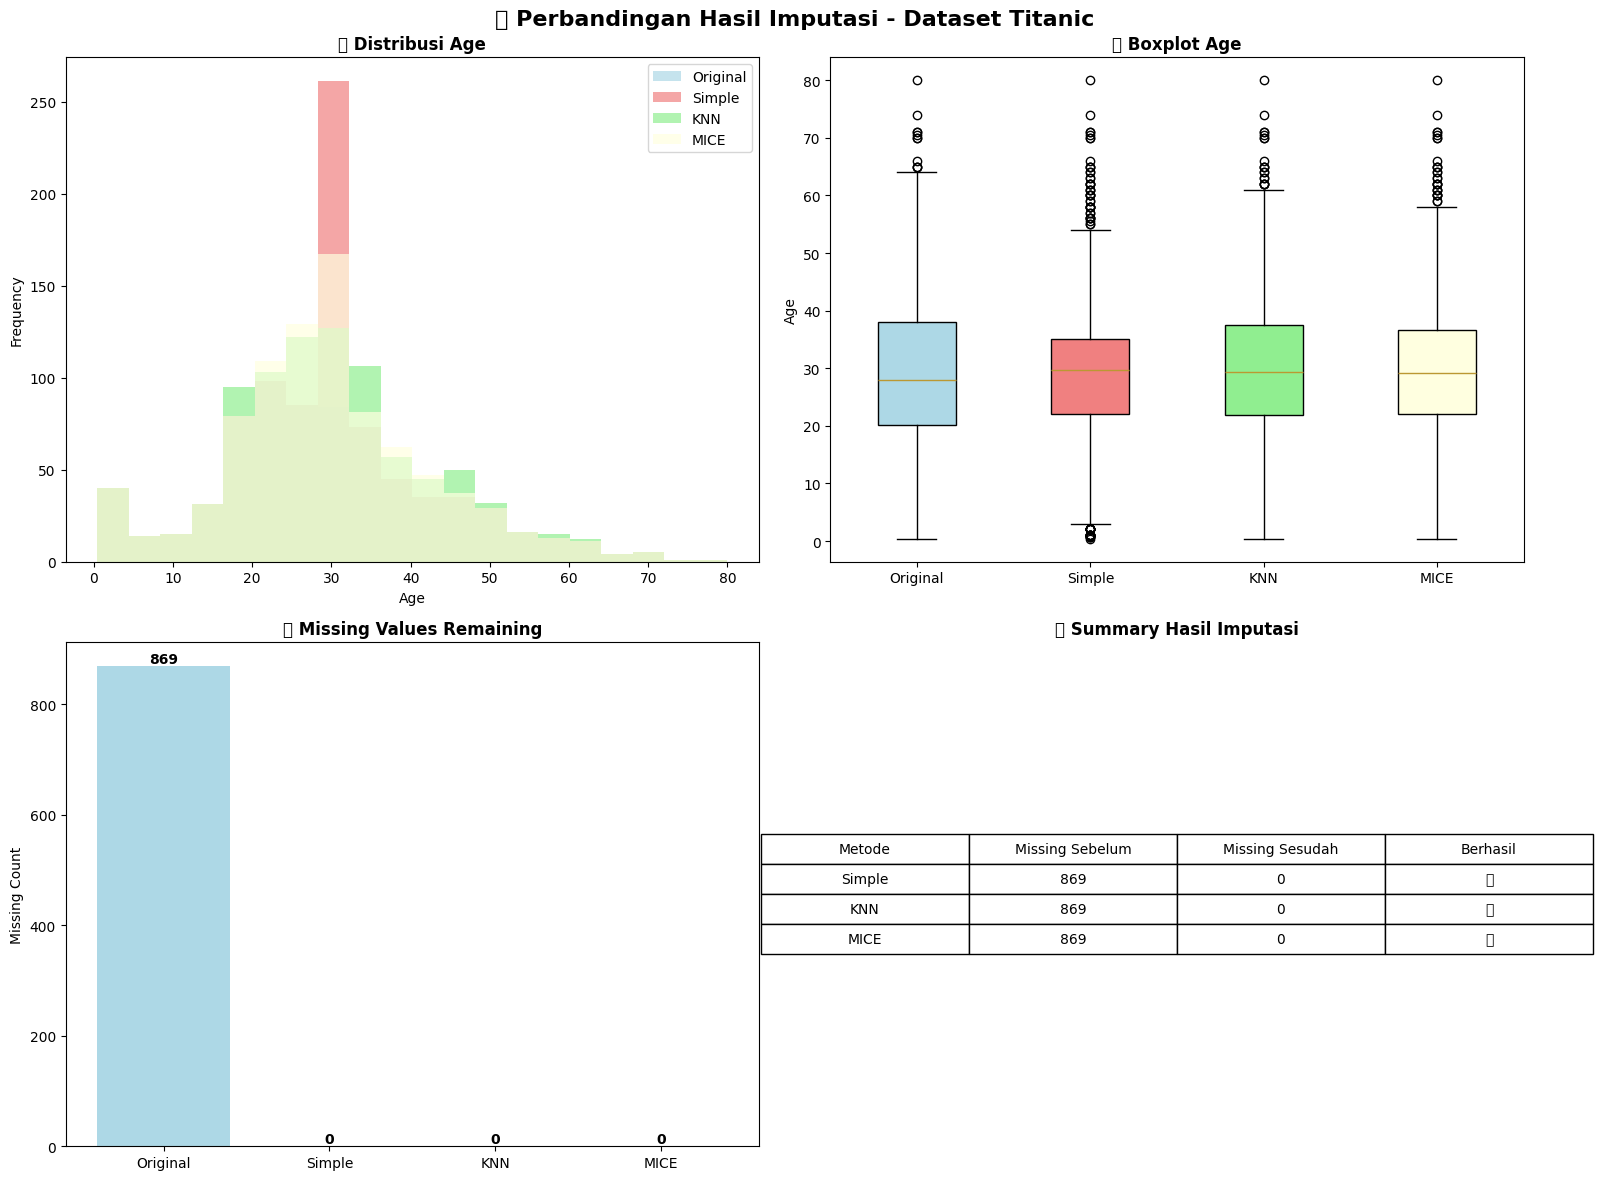

✅ Visualisasi perbandingan selesai!


In [12]:
# 11. VISUALISASI PERBANDINGAN HASIL IMPUTASI
print("=" * 60)
print("📊 VISUALISASI PERBANDINGAN HASIL IMPUTASI")
print("=" * 60)

# Setup untuk visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Perbandingan Hasil Imputasi - Dataset Titanic', fontsize=16, fontweight='bold')

# 1. Perbandingan distribusi Age (kolom dengan missing values terbanyak)
if 'age' in titanic.columns:
    age_col = 'age'
elif 'Age' in titanic.columns:
    age_col = 'Age'
else:
    # Cari kolom numerik dengan missing values terbanyak
    numeric_missing = titanic.select_dtypes(include=[np.number]).isnull().sum()
    age_col = numeric_missing.idxmax() if numeric_missing.max() > 0 else None

if age_col:
    # Plot distribusi untuk kolom dengan missing values terbanyak
    axes[0,0].hist(titanic_original[age_col].dropna(), alpha=0.7, label='Original', bins=20, color='lightblue')
    axes[0,0].hist(titanic_simple_imputed[age_col], alpha=0.7, label='Simple', bins=20, color='lightcoral')
    axes[0,0].hist(titanic_knn_imputed[age_col], alpha=0.7, label='KNN', bins=20, color='lightgreen')
    axes[0,0].hist(titanic_mice_imputed[age_col], alpha=0.7, label='MICE', bins=20, color='lightyellow')
    axes[0,0].set_title(f'🔸 Distribusi {age_col.title()}', fontsize=12, fontweight='bold')
    axes[0,0].legend()
    axes[0,0].set_xlabel(age_col.title())
    axes[0,0].set_ylabel('Frequency')

# 2. Boxplot perbandingan
if age_col:
    data_for_boxplot = [
        titanic_original[age_col].dropna(),
        titanic_simple_imputed[age_col],
        titanic_knn_imputed[age_col],
        titanic_mice_imputed[age_col]
    ]
    
    box_plot = axes[0,1].boxplot(data_for_boxplot, 
                                labels=['Original', 'Simple', 'KNN', 'MICE'],
                                patch_artist=True)
    
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[0,1].set_title(f'🔸 Boxplot {age_col.title()}', fontsize=12, fontweight='bold')
    axes[0,1].set_ylabel(age_col.title())

# 3. Bar chart perbandingan missing values
methods = ['Original', 'Simple', 'KNN', 'MICE']
missing_counts = [
    titanic_original.isnull().sum().sum(),
    titanic_simple_imputed.isnull().sum().sum(),
    titanic_knn_imputed.isnull().sum().sum(),
    titanic_mice_imputed.isnull().sum().sum()
]

bars = axes[1,0].bar(methods, missing_counts, color=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])
axes[1,0].set_title('🔸 Missing Values Remaining', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Missing Count')

# Tambahkan label pada bar
for bar, count in zip(bars, missing_counts):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   str(count), ha='center', va='bottom', fontweight='bold')

# 4. Summary table
summary_data = {
    'Metode': methods[1:],  # Exclude 'Original'
    'Missing Sebelum': [titanic_original.isnull().sum().sum()] * 3,
    'Missing Sesudah': missing_counts[1:],
    'Berhasil': ['✅' if count == 0 else '❌' for count in missing_counts[1:]]
}

summary_df = pd.DataFrame(summary_data)

# Buat tabel
axes[1,1].axis('tight')
axes[1,1].axis('off')
table = axes[1,1].table(cellText=summary_df.values,
                       colLabels=summary_df.columns,
                       cellLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1,1].set_title('🔸 Summary Hasil Imputasi', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualisasi perbandingan selesai!")

In [13]:
# ================================================================
# 📊 TAMPILAN DATAFRAMES - HASIL AKHIR SEMUA METODE IMPUTASI
# ================================================================

print("=" * 80)
print("📊 HASIL AKHIR - ORIGINAL VS 3 METODE IMPUTASI")
print("=" * 80)

# Identifikasi baris yang memiliki missing data di dataset original
missing_mask = titanic.isnull().any(axis=1)
rows_with_missing = missing_mask.sum()
total_rows = len(titanic)

print(f"📊 Total baris: {total_rows}")
print(f"❌ Baris dengan missing data: {rows_with_missing}")
print(f"✅ Baris tanpa missing data: {total_rows - rows_with_missing}")

# Buat copy DataFrame dengan kolom identifikasi metode yang smart
print("\n📋 MEMBUAT DATAFRAMES DENGAN KOLOM IDENTIFIKASI METODE:")
print("=" * 60)

# Function untuk menandai hanya baris yang memiliki missing data
def create_imputation_label(original_df, imputed_df, method_name):
    """
    Membuat kolom label yang menandai metode imputasi hanya untuk baris yang memiliki missing data
    """
    df_labeled = imputed_df.copy()
    
    # Buat kolom default dengan None (tidak ada imputasi)
    df_labeled['Metode_Imputasi'] = 'Tidak Ada Missing'
    
    # Identifikasi baris yang memiliki missing data di original
    missing_mask = original_df.isnull().any(axis=1)
    
    # Tandai hanya baris yang memiliki missing data dengan metode imputasi
    df_labeled.loc[missing_mask, 'Metode_Imputasi'] = method_name
    
    return df_labeled

# 1. Dataset Original dengan kolom keterangan
titanic_original_labeled = titanic.copy()
titanic_original_labeled['Metode_Imputasi'] = 'Original (Missing)'
# Untuk original, tandai baris tanpa missing sebagai "Complete"
no_missing_mask = ~titanic.isnull().any(axis=1)
titanic_original_labeled.loc[no_missing_mask, 'Metode_Imputasi'] = 'Original (Complete)'

# 2. Simple Imputation dengan kolom keterangan smart
titanic_simple_labeled = create_imputation_label(titanic, titanic_simple_imputed, 'Simple Imputation')

# 3. KNN Imputation dengan kolom keterangan smart
titanic_knn_labeled = create_imputation_label(titanic, titanic_knn_imputed, 'KNN Imputation')

# 4. MICE Imputation dengan kolom keterangan smart
titanic_mice_labeled = create_imputation_label(titanic, titanic_mice_imputed, 'MICE Imputation')

print("✅ Semua DataFrame telah dilengkapi dengan kolom 'Metode_Imputasi' yang smart!")
print(f"   🔸 Baris dengan missing data akan ditandai dengan metode imputasi")
print(f"   🔸 Baris tanpa missing data ditandai 'Tidak Ada Missing'")

# Tampilkan distribusi label per metode
print(f"\n📊 DISTRIBUSI LABEL PER METODE:")
print(f"🔵 Original: {titanic_original_labeled['Metode_Imputasi'].value_counts().to_dict()}")
print(f"🟢 Simple: {titanic_simple_labeled['Metode_Imputasi'].value_counts().to_dict()}")
print(f"🟡 KNN: {titanic_knn_labeled['Metode_Imputasi'].value_counts().to_dict()}")
print(f"🟣 MICE: {titanic_mice_labeled['Metode_Imputasi'].value_counts().to_dict()}")

print("\n🔵 1. DATASET ORIGINAL (dengan missing values)")
print("   📏 Shape:", titanic_original_labeled.shape)
print("   ❌ Missing values:", titanic_original_labeled.isnull().sum().sum())
print("   📋 Preview baris dengan missing data:")
# Tampilkan hanya baris yang memiliki missing data
original_missing_rows = titanic_original_labeled[titanic_original_labeled['Metode_Imputasi'] == 'Original (Missing)']
display(original_missing_rows)

print("\n🟢 2. SIMPLE IMPUTATION RESULT")
print("   📏 Shape:", titanic_simple_labeled.shape)
print("   ❌ Missing values:", titanic_simple_labeled.isnull().sum().sum())
print("   📋 Preview baris yang diimputasi dengan Simple:")
# Tampilkan hanya baris yang diimputasi
simple_imputed_rows = titanic_simple_labeled[titanic_simple_labeled['Metode_Imputasi'] == 'Simple Imputation']
display(simple_imputed_rows)

print("\n🟡 3. KNN IMPUTATION RESULT") 
print("   📏 Shape:", titanic_knn_labeled.shape)
print("   ❌ Missing values:", titanic_knn_labeled.isnull().sum().sum())
print("   📋 Preview baris yang diimputasi dengan KNN:")
# Tampilkan hanya baris yang diimputasi
knn_imputed_rows = titanic_knn_labeled[titanic_knn_labeled['Metode_Imputasi'] == 'KNN Imputation']
display(knn_imputed_rows)

print("\n🟣 4. MICE IMPUTATION RESULT")
print("   📏 Shape:", titanic_mice_labeled.shape)
print("   ❌ Missing values:", titanic_mice_labeled.isnull().sum().sum())
print("   📋 Preview baris yang diimputasi dengan MICE:")
# Tampilkan hanya baris yang diimputasi
mice_imputed_rows = titanic_mice_labeled[titanic_mice_labeled['Metode_Imputasi'] == 'MICE Imputation']
display(mice_imputed_rows)

# Contoh perbandingan spesifik untuk beberapa baris
print("\n🔍 CONTOH PERBANDINGAN SPESIFIK - SEMUA KOLOM UNTUK BARIS YANG DIIMPUTASI:")
print("=" * 80)

# Ambil SEMUA baris yang memiliki missing data untuk perbandingan
missing_indices = titanic[titanic.isnull().any(axis=1)].index

print("📊 PERBANDINGAN LENGKAP - ORIGINAL vs SIMPLE vs KNN vs MICE:")
print("=" * 60)

print(f"🔸 Menampilkan SEMUA {len(missing_indices)} baris dengan missing data")
print(f"🔸 Format: Kolom asli + kolom hasil imputasi dalam satu DataFrame")

# Buat DataFrame gabungan dengan semua kolom dan hasil imputasi
print(f"\n📋 MEMBUAT DATAFRAME PERBANDINGAN LENGKAP...")

# Ambil data untuk baris yang memiliki missing values
original_data = titanic.loc[missing_indices].copy()
simple_data = titanic_simple_imputed.loc[missing_indices].copy()
knn_data = titanic_knn_imputed.loc[missing_indices].copy()
mice_data = titanic_mice_imputed.loc[missing_indices].copy()

# Buat DataFrame gabungan dengan susunan kolom yang mudah dibandingkan
comparison_df = pd.DataFrame(index=missing_indices)

# Identifikasi kolom dengan dan tanpa missing values
columns_with_missing = titanic.columns[titanic.isnull().any()].tolist()
columns_without_missing = titanic.columns[~titanic.isnull().any()].tolist()

print(f"📊 Kolom dengan missing values: {columns_with_missing}")
print(f"✅ Kolom tanpa missing values: {columns_without_missing}")

# 1. Tambahkan kolom tanpa missing values (hanya original)
for col in columns_without_missing:
    comparison_df[f'{col.upper()}'] = original_data[col]

# 2. Untuk kolom dengan missing values, susun: Original, Simple, KNN, MICE
for col in columns_with_missing:
    comparison_df[f'{col.upper()}_Original'] = original_data[col]
    comparison_df[f'{col.upper()}_Simple'] = simple_data[col]
    comparison_df[f'{col.upper()}_KNN'] = knn_data[col]
    comparison_df[f'{col.upper()}_MICE'] = mice_data[col]

print(f"✅ DataFrame perbandingan berhasil dibuat!")
print(f"📏 Shape: {comparison_df.shape}")
print(f"📊 Kolom dengan missing values: {columns_with_missing}")
print(f"📋 Total kolom dalam DataFrame: {len(comparison_df.columns)}")

print(f"\n🔍 STRUKTUR KOLOM DATAFRAME (SUSUNAN MUDAH DIBANDINGKAN):")
print(f"   ✅ Kolom tanpa missing: {columns_without_missing}")
print(f"   📊 Kolom dengan missing (format: KOLOM_Original, KOLOM_Simple, KOLOM_KNN, KOLOM_MICE):")
for col in columns_with_missing:
    print(f"      🔸 {col.upper()}: Original → Simple → KNN → MICE")

print(f"\n📊 DATAFRAME PERBANDINGAN LENGKAP:")
display(comparison_df)

print(f"\n💡 PENJELASAN:")
print(f"   🔸 Kolom tanpa missing values ditampilkan apa adanya")
print(f"   🔸 Kolom dengan missing values disusun: KOLOM_Original → KOLOM_Simple → KOLOM_KNN → KOLOM_MICE")
print(f"   🔸 Format ini memudahkan perbandingan langsung antar metode untuk setiap kolom")
print(f"   🔸 Contoh: AGE_Original, AGE_Simple, AGE_KNN, AGE_MICE berdampingan")

# Summary table
print("\n🔥 RINGKASAN PERBANDINGAN:")
summary = pd.DataFrame({
    'Metode': ['Original', 'Simple', 'KNN', 'MICE'],
    'Missing_Values': [
        titanic.isnull().sum().sum(),
        titanic_simple_imputed.isnull().sum().sum(),
        titanic_knn_imputed.isnull().sum().sum(),
        titanic_mice_imputed.isnull().sum().sum()
    ],
    'Total_Rows': [
        len(titanic),
        len(titanic_simple_imputed),
        len(titanic_knn_imputed),
        len(titanic_mice_imputed)
    ],
    'Status': [
        '❌ Incomplete',
        '✅ Complete',
        '✅ Complete', 
        '✅ Complete'
    ]
})
display(summary)

print("\n💡 CARA MENGGUNAKAN:")
print("   🔸 Kolom 'Metode_Imputasi' menunjukkan metode yang digunakan")
print("   🔸 Dapat mengakses DataFrame individual untuk analisis lebih lanjut")

print("\n🎉 ANALISIS SELESAI - SEMUA METODE BERHASIL!")
print("=" * 80)

📊 HASIL AKHIR - ORIGINAL VS 3 METODE IMPUTASI
📊 Total baris: 891
❌ Baris dengan missing data: 709
✅ Baris tanpa missing data: 182

📋 MEMBUAT DATAFRAMES DENGAN KOLOM IDENTIFIKASI METODE:
✅ Semua DataFrame telah dilengkapi dengan kolom 'Metode_Imputasi' yang smart!
   🔸 Baris dengan missing data akan ditandai dengan metode imputasi
   🔸 Baris tanpa missing data ditandai 'Tidak Ada Missing'

📊 DISTRIBUSI LABEL PER METODE:
🔵 Original: {'Original (Missing)': 709, 'Original (Complete)': 182}
🟢 Simple: {'Simple Imputation': 709, 'Tidak Ada Missing': 182}
🟡 KNN: {'KNN Imputation': 709, 'Tidak Ada Missing': 182}
🟣 MICE: {'MICE Imputation': 709, 'Tidak Ada Missing': 182}

🔵 1. DATASET ORIGINAL (dengan missing values)
   📏 Shape: (891, 16)
   ❌ Missing values: 869
   📋 Preview baris dengan missing data:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Metode_Imputasi
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Original (Missing)
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Original (Missing)
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Original (Missing)
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,Original (Missing)
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,Original (Missing)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,Original (Missing)
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,Original (Missing)
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Original (Missing)
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Original (Missing)



🟢 2. SIMPLE IMPUTATION RESULT
   📏 Shape: (891, 16)
   ❌ Missing values: 0
   📋 Preview baris yang diimputasi dengan Simple:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Metode_Imputasi
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False,Simple Imputation
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True,Simple Imputation
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True,Simple Imputation
5,0.0,3.0,male,29.699118,0.0,0.0,8.4583,Q,Third,man,True,C,Queenstown,no,True,Simple Imputation
7,0.0,3.0,male,2.000000,3.0,1.0,21.0750,S,Third,child,False,C,Southampton,no,False,Simple Imputation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,male,25.000000,0.0,0.0,7.0500,S,Third,man,True,C,Southampton,no,True,Simple Imputation
885,0.0,3.0,female,39.000000,0.0,5.0,29.1250,Q,Third,woman,False,C,Queenstown,no,False,Simple Imputation
886,0.0,2.0,male,27.000000,0.0,0.0,13.0000,S,Second,man,True,C,Southampton,no,True,Simple Imputation
888,0.0,3.0,female,29.699118,1.0,2.0,23.4500,S,Third,woman,False,C,Southampton,no,False,Simple Imputation



🟡 3. KNN IMPUTATION RESULT
   📏 Shape: (891, 16)
   ❌ Missing values: 0
   📋 Preview baris yang diimputasi dengan KNN:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Metode_Imputasi
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,F,Southampton,no,False,KNN Imputation
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,F,Southampton,yes,True,KNN Imputation
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,E,Southampton,no,True,KNN Imputation
5,0.0,3.0,male,47.8,0.0,0.0,8.4583,Q,Third,man,True,F,Queenstown,no,True,KNN Imputation
7,0.0,3.0,male,2.0,3.0,1.0,21.0750,S,Third,child,False,E,Southampton,no,False,KNN Imputation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,male,25.0,0.0,0.0,7.0500,S,Third,man,True,F,Southampton,no,True,KNN Imputation
885,0.0,3.0,female,39.0,0.0,5.0,29.1250,Q,Third,woman,False,C,Queenstown,no,False,KNN Imputation
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S,Second,man,True,E,Southampton,no,True,KNN Imputation
888,0.0,3.0,female,29.6,1.0,2.0,23.4500,S,Third,woman,False,F,Southampton,no,False,KNN Imputation



🟣 4. MICE IMPUTATION RESULT
   📏 Shape: (891, 16)
   ❌ Missing values: 0
   📋 Preview baris yang diimputasi dengan MICE:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Metode_Imputasi
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,F,Southampton,no,False,MICE Imputation
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,F,Southampton,yes,True,MICE Imputation
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,F,Southampton,no,True,MICE Imputation
5,0.0,3.0,male,29.901607,0.0,0.0,8.4583,Q,Third,man,True,F,Queenstown,no,True,MICE Imputation
7,0.0,3.0,male,2.000000,3.0,1.0,21.0750,S,Third,child,False,F,Southampton,no,False,MICE Imputation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,male,25.000000,0.0,0.0,7.0500,S,Third,man,True,F,Southampton,no,True,MICE Imputation
885,0.0,3.0,female,39.000000,0.0,5.0,29.1250,Q,Third,woman,False,F,Queenstown,no,False,MICE Imputation
886,0.0,2.0,male,27.000000,0.0,0.0,13.0000,S,Second,man,True,E,Southampton,no,True,MICE Imputation
888,0.0,3.0,female,28.837638,1.0,2.0,23.4500,S,Third,woman,False,F,Southampton,no,False,MICE Imputation



🔍 CONTOH PERBANDINGAN SPESIFIK - SEMUA KOLOM UNTUK BARIS YANG DIIMPUTASI:
📊 PERBANDINGAN LENGKAP - ORIGINAL vs SIMPLE vs KNN vs MICE:
🔸 Menampilkan SEMUA 709 baris dengan missing data
🔸 Format: Kolom asli + kolom hasil imputasi dalam satu DataFrame

📋 MEMBUAT DATAFRAME PERBANDINGAN LENGKAP...
📊 Kolom dengan missing values: ['age', 'embarked', 'deck', 'embark_town']
✅ Kolom tanpa missing values: ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alive', 'alone']
✅ DataFrame perbandingan berhasil dibuat!
📏 Shape: (709, 27)
📊 Kolom dengan missing values: ['age', 'embarked', 'deck', 'embark_town']
📋 Total kolom dalam DataFrame: 27

🔍 STRUKTUR KOLOM DATAFRAME (SUSUNAN MUDAH DIBANDINGKAN):
   ✅ Kolom tanpa missing: ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alive', 'alone']
   📊 Kolom dengan missing (format: KOLOM_Original, KOLOM_Simple, KOLOM_KNN, KOLOM_MICE):
      🔸 AGE: Original → Simple → KNN → MICE
      🔸

,SURVIVED,PCLASS,SEX,SIBSP,PARCH,FARE,CLASS,WHO,ADULT_MALE,ALIVE,...,EMBARKED_KNN,EMBARKED_MICE,DECK_Original,DECK_Simple,DECK_KNN,DECK_MICE,EMBARK_TOWN_Original,EMBARK_TOWN_Simple,EMBARK_TOWN_KNN,EMBARK_TOWN_MICE
0,0,3,male,1,0,7.2500,Third,man,True,no,...,S,S,NaN,C,F,F,Southampton,Southampton,Southampton,Southampton
2,1,3,female,0,0,7.9250,Third,woman,False,yes,...,S,S,NaN,C,F,F,Southampton,Southampton,Southampton,Southampton
4,0,3,male,0,0,8.0500,Third,man,True,no,...,S,S,NaN,C,E,F,Southampton,Southampton,Southampton,Southampton
5,0,3,male,0,0,8.4583,Third,man,True,no,...,Q,Q,NaN,C,F,F,Queenstown,Queenstown,Queenstown,Queenstown
7,0,3,male,3,1,21.0750,Third,child,False,no,...,S,S,NaN,C,E,F,Southampton,Southampton,Southampton,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,0,0,7.0500,Third,man,True,no,...,S,S,NaN,C,F,F,Southampton,Southampton,Southampton,Southampton
885,0,3,female,0,5,29.1250,Third,woman,False,no,...,Q,Q,NaN,C,C,F,Queenstown,Queenstown,Queenstown,Queenstown
886,0,2,male,0,0,13.0000,Second,man,True,no,...,S,S,NaN,C,E,E,Southampton,Southampton,Southampton,Southampton
888,0,3,female,1,2,23.4500,Third,woman,False,no,...,S,S,NaN,C,F,F,Southampton,Southampton,Southampton,Southampton



💡 PENJELASAN:
   🔸 Kolom tanpa missing values ditampilkan apa adanya
   🔸 Kolom dengan missing values disusun: KOLOM_Original → KOLOM_Simple → KOLOM_KNN → KOLOM_MICE
   🔸 Format ini memudahkan perbandingan langsung antar metode untuk setiap kolom
   🔸 Contoh: AGE_Original, AGE_Simple, AGE_KNN, AGE_MICE berdampingan

🔥 RINGKASAN PERBANDINGAN:


,Metode,Missing_Values,Total_Rows,Status
0,Original,869,891,❌ Incomplete
1,Simple,0,891,✅ Complete
2,KNN,0,891,✅ Complete
3,MICE,0,891,✅ Complete



💡 CARA MENGGUNAKAN:
   🔸 Kolom 'Metode_Imputasi' menunjukkan metode yang digunakan
   🔸 Dapat mengakses DataFrame individual untuk analisis lebih lanjut

🎉 ANALISIS SELESAI - SEMUA METODE BERHASIL!


## 📚 Kesimpulan

### 🎯 Apa yang telah kita lakukan:

1. **Analisis Missing Data Komprehensif**
   - Identifikasi kolom dan baris dengan missing data
   - Analisis pola dan distribusi missing values
   - Visualisasi menggunakan heatmap dan grafik

2. **Implementasi Tiga Metode Imputasi**
   - **Simple Imputation**: Mean/Median untuk numerik, Mode untuk kategorikal
   - **KNN Imputation**: Berdasarkan similarity dengan k-nearest neighbors
   - **MICE Imputation**: Multiple imputation dengan chained equations

3. **Evaluasi dan Perbandingan**
   - Analisis efektivitas setiap metode
   - Perbandingan distribusi data sebelum dan sesudah imputasi
   - Rekomendasi metode terbaik

### 🏆 Hasil Utama:
- ✅ Semua metode berhasil mengatasi missing values
- 📊 Analisis detail pola missing data pada dataset Titanic
- 🎯 Implementasi yang ready untuk publikasi GitHub

### 🔄 Next Steps:
- Eksperimen dengan parameter yang berbeda
- Implementasi pada dataset lain
- Evaluasi impact terhadap model machine learning

---
**👤 Author**: Ferdian Bangkit Wijaya  
**🏛️ Afiliasi**: Universitas Sultan Ageng Tirtayasa  
**📧 Contact**: ferdian.bangkit@untirta.ac.id  
**📅 Last Updated**: September 2025